### Magdalena Sudół

### Zadanie 2

In [1]:
import numpy as np
import scipy.stats 
import matplotlib.pyplot as plt

Z populacji generalnej o rozkładzie normalnym $N(0.2, \sigma^2)$ pobrano próbę (dane 2, dostępne
na stronie). Na poziomie istotności $\alpha = 0.05$ zweryfikuj hipotezy
- $\sigma^2 \ne 1.5$,
- $\sigma^2 > 1.5$,
- $\sigma^2 < 1.5$.

Narysuj odpowiednie obszary kytyczne i wyznacz p-wartości dla każdej z powyższych hipotez.
Odpowiedz na pytanie, co stanie się, kiedy zwiększymy bądź zmniejszymy poziom ufności.

In [2]:
file = open('lista8_zad2.txt', 'r')
data = file.read().split()
file.close()

data = np.array([float(x) for x in data])

mi = 0.2
alpha = 0.1
sigma_0 = 1.5

mean = np.mean(data)
std = np.std(data)
n = len(data)

print("średnia: ", mean)
print("odchylenie standardowe: ", std)
print("n: ", n)

średnia:  0.24916501030311
odchylenie standardowe:  1.2909115668210043
n:  1000


In [3]:
s_squared = 1/(n-1)*np.sum((data-mi)**2)
print(s_squared)

1.6705404120023675


In [4]:
chi2 = (n-1) * s_squared / sigma_0
print("Wartość statystyki: ", chi2)

p_value_two_tail = 2 * min(scipy.stats.chi2.cdf(chi2, df=n-1), 1 - scipy.stats.chi2.cdf(chi2, df=n-1))
p_value_one_tail_right = 1 - scipy.stats.chi2.cdf(chi2, df=n-1)
p_value_one_tail_left = scipy.stats.chi2.cdf(chi2, df=n-1)

print("P-wartość dla dwustronnego testu: ", p_value_two_tail)
print("P-wartość dla jednostronnego testu (H1: sigma > 1.5): ", p_value_one_tail_right)
print("P-wartość dla jednostronnego testu (H1: sigma < 1.5): ", p_value_one_tail_left)

Wartość statystyki:  1112.5799143935767
P-wartość dla dwustronnego testu:  0.013686145574530961
P-wartość dla jednostronnego testu (H1: sigma > 1.5):  0.006843072787265481
P-wartość dla jednostronnego testu (H1: sigma < 1.5):  0.9931569272127345


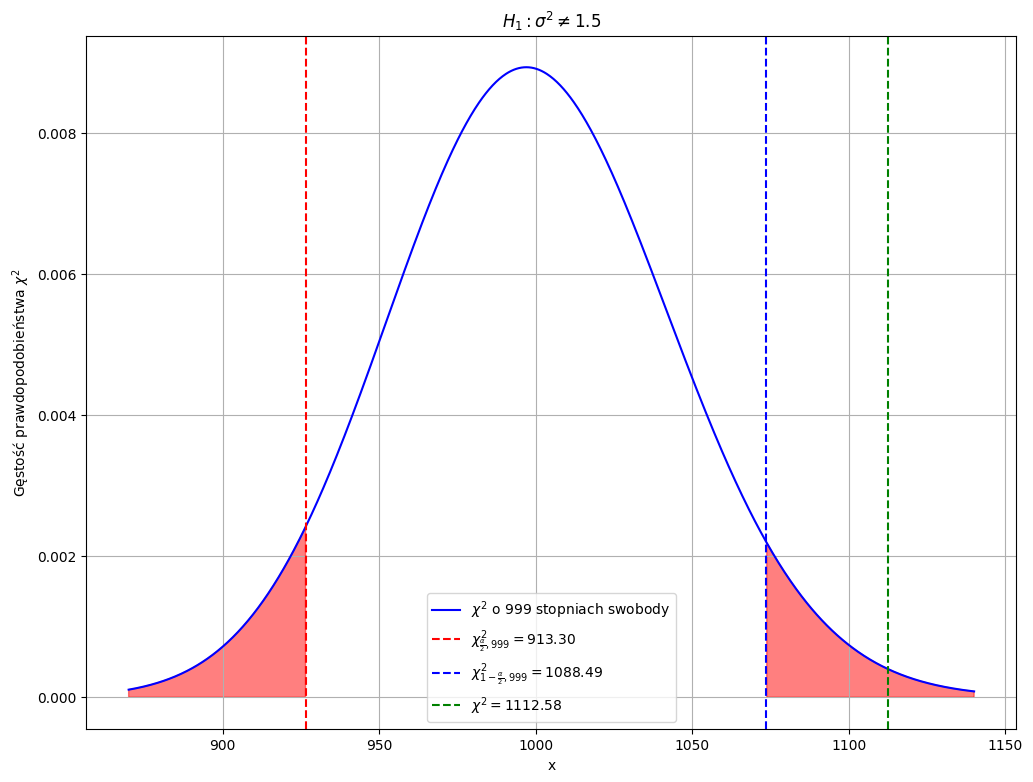

In [5]:
lower_quantile = scipy.stats.chi2.ppf(alpha/2, n-1)
upper_quantile = scipy.stats.chi2.ppf(1-alpha/2, n-1)

# Wykres obszarów krytycznych
x = np.linspace(870, 1140, 1000)
y = scipy.stats.chi2.pdf(x, df=n-1)

plt.figure(figsize = (12,9))
plt.plot(x, y, label='$\\chi^2$ o 999 stopniach swobody', color='blue')
plt.fill_between(x, y, where=(x < lower_quantile) | (x > upper_quantile), color='red', alpha=0.5)
plt.axvline(lower_quantile, color='red', linestyle='--', label='$\\chi^2_{\\frac{\\alpha}{2}, 999} = 913.30$')
plt.axvline(upper_quantile, color='blue', linestyle='--', label='$\\chi^2_{1-\\frac{\\alpha}{2}, 999} = 1088.49$')
plt.axvline(chi2, color='green', linestyle='--', label='$\\chi^2 = 1112.58$')

plt.title(f'$H_1: \\sigma^2 \\ne 1.5$')
plt.xlabel('x')
plt.ylabel('Gęstość prawdopodobieństwa $\\chi^2$')
plt.legend(loc='lower center')
plt.grid()
plt.savefig('hipoteza2.1.png')
plt.show()

1073.6426506574246


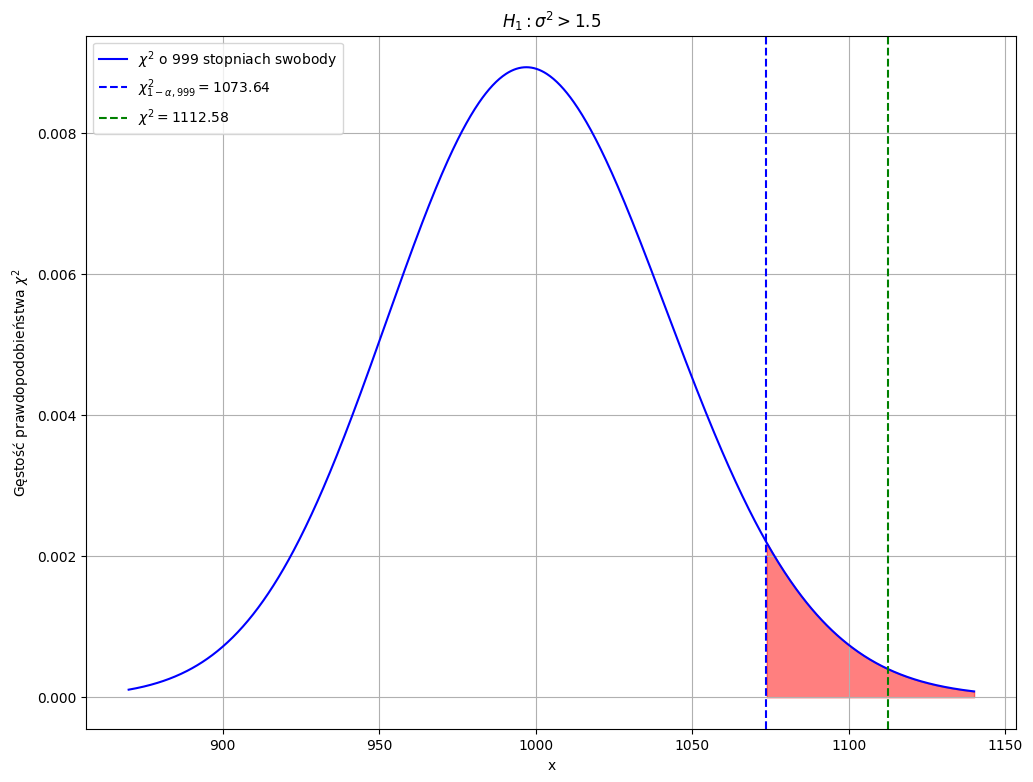

In [6]:
quantile_right = scipy.stats.chi2.ppf(1-alpha/2, n-1)
print(quantile_right)

plt.figure(figsize = (12,9))
plt.plot(x, y, label='$\\chi^2$ o 999 stopniach swobody', color='blue')
plt.fill_between(x, y, where=(x > quantile_right), color='red', alpha=0.5)
plt.axvline(quantile_right, color='blue', linestyle='--', label='$\\chi^2_{1-\\alpha, 999} = 1073.64$')
plt.axvline(chi2, color='green', linestyle='--', label='$\\chi^2 = 1112.58$')

plt.title(f'$H_1: \\sigma^2 > 1.5$')
plt.xlabel('x')
plt.ylabel('Gęstość prawdopodobieństwa $\\chi^2$')
plt.legend(loc='upper left')
plt.grid()
plt.savefig('hipoteza2.2.png')
plt.show()

926.6311609204329


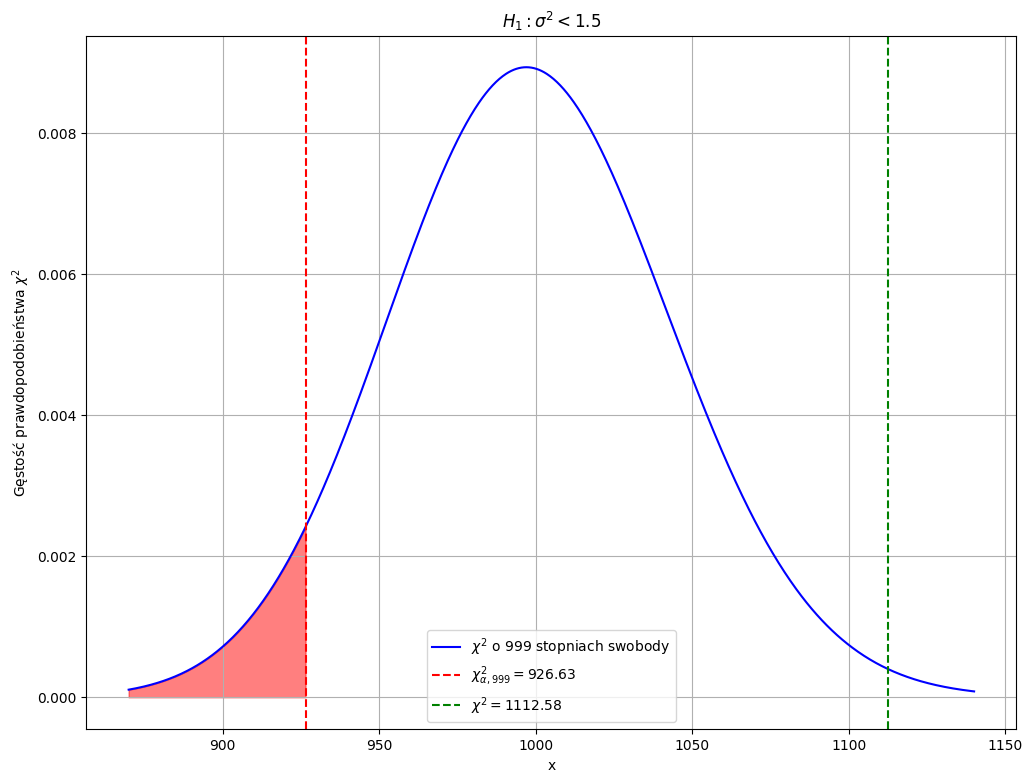

In [7]:
quantile_left = scipy.stats.chi2.ppf(alpha/2, n-1)
print(quantile_left)

plt.figure(figsize = (12,9))
plt.plot(x, y, label='$\\chi^2$ o 999 stopniach swobody', color='blue')
plt.fill_between(x, y, where=(x < quantile_left), color='red', alpha=0.5) 
plt.axvline(quantile_left, color='red', linestyle='--', label='$\\chi^2_{\\alpha, 999} = 926.63$')
plt.axvline(chi2, color='green', linestyle='--', label='$\\chi^2 = 1112.58$')

plt.title(f'$H_1: \\sigma^2 < 1.5$')
plt.xlabel('x')
plt.ylabel('Gęstość prawdopodobieństwa $\\chi^2$')
plt.legend(loc='lower center')
plt.grid()
plt.savefig('hipoteza2.3.png')
plt.show()

Obszary krytyczne dla innych $\alpha$:

In [8]:
alpha1 = 0.01
alpha2 = 0.1

#hipoteza 1
lower_quantile_alpha_1 = scipy.stats.chi2.ppf(alpha1/2, n-1)
upper_quantile_alpha_1 = scipy.stats.chi2.ppf(1-alpha1/2, n-1)

lower_quantile_alpha_2 = scipy.stats.chi2.ppf(alpha2/2, n-1)
upper_quantile_alpha_2 = scipy.stats.chi2.ppf(1-alpha2/2, n-1)

print("Obszary krytyczne dla hipotezy 1:")
print("alpha = ", alpha1, ": (-inf, ", lower_quantile_alpha_1, "), (", upper_quantile_alpha_1, ", inf)")
print("alpha = ", alpha2, ": (-inf, ", lower_quantile_alpha_2, "), (", upper_quantile_alpha_2, ", inf)")

#hipoteza 2
quantile_right_alpha_1 = scipy.stats.chi2.ppf(1-alpha1, n-1)
quantile_right_alpha_2 = scipy.stats.chi2.ppf(1-alpha2, n-1)

print("Obszary krytyczne dla hipotezy 2:")
print("alpha = ", alpha1, ": (", quantile_right_alpha_1, ", inf)")
print("alpha = ", alpha2, ": (", quantile_right_alpha_2, ", inf)")

#hipoteza 3
quantile_left_alpha_1 = scipy.stats.chi2.ppf(alpha1, n-1)
quantile_left_alpha_2 = scipy.stats.chi2.ppf(alpha2, n-1)

print("Obszary krytyczne dla hipotezy 3:")
print("alpha = ", alpha1, ": (-inf,", quantile_left_alpha_1, ")")
print("alpha = ", alpha2, ": (-inf,", quantile_left_alpha_2, ")")

Obszary krytyczne dla hipotezy 1:
alpha =  0.01 : (-inf,  887.6211352175186 ), ( 1117.890452678641 , inf)
alpha =  0.1 : (-inf,  926.6311609204329 ), ( 1073.6426506574246 , inf)
Obszary krytyczne dla hipotezy 2:
alpha =  0.01 : ( 1105.9169575045823 , inf)
alpha =  0.1 : ( 1056.6952292962342 , inf)
Obszary krytyczne dla hipotezy 3:
alpha =  0.01 : (-inf, 897.9644826908501 )
alpha =  0.1 : (-inf, 942.1612343926897 )
